# Classification with Logistic Regression

Logistic Regression algorithm is preferred over Linear Regression as it involves working with a function that ressembles an 'S', called 'Sigmoid' in the conventional ML terminology. This function proves quite useful to predict new output values as a binary possible result (y/n, 1 or 0, etc.)

This notebook implements said function from scratch and plots it next to the training data to show how the model closely fits the dataset.

Linear Regression can be used first, the multilinear model $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot  \mathbf{x}^{(i)} + b$, to predict $y$ given $x$, and then its output can be fed into the Sigmoid function.

### Sigmoid Function Formula

The following is the formula for the Sigmoid Function:

$g(z) = \frac{1}{1+e^{-z}}$

In logistic regression, z (the input to the sigmoid function), is the output of a linear regression model.

**Observations**

- In the case of a single example, $z$ is scalar.
- in the case of multiple examples, $z$ may be a vector consisting of $m$ values, one for each example. 

In [24]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import importlib

# Custom scripts imports
# Adding the directory to sys.path
sys.path.insert(0, os.path.abspath('../'))

# Import the module first
from src.visualization import visualize
from src.models import predict_model

# Now reload using the module reference
importlib.reload(visualize)
importlib.reload(predict_model)

# Now, import the function from the reloaded module
from src.visualization.visualize import draw_threshold
from src.models.predict_model import gradient_descent

Numpy library includes the [`exp()`](https://numpy.org/doc/stable/reference/generated/numpy.exp.html) function, which can be used to calculate the exponential ( $e^{z}$) of all elements in an input array (`z`). Exemplifying this in below cell:

In [3]:
input_array = np.array([1,2,3])
e_exp_array = np.exp(input_array)
print(f"Exp function output: {e_exp_array}")

Exp function output: [ 2.71828183  7.3890561  20.08553692]


And the following is the sigmoid function implementation in Python:

In [4]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """
    return 1 / (1 + np.exp(-z))

Displaying in a plot this function shows its usage:

In [5]:
# Array generated with values in a range
z_1 = np.arange(-10, 11)
# Get the sigmoid values by inputting the array to the Sigmoid function
y_out = sigmoid(z_1)
print("Input (z), Output (sigmoid(z))")
np.set_printoptions(precision=3) 
print(np.c_[z_1, y_out])

Input (z), Output (sigmoid(z))
[[-1.000e+01  4.540e-05]
 [-9.000e+00  1.234e-04]
 [-8.000e+00  3.354e-04]
 [-7.000e+00  9.111e-04]
 [-6.000e+00  2.473e-03]
 [-5.000e+00  6.693e-03]
 [-4.000e+00  1.799e-02]
 [-3.000e+00  4.743e-02]
 [-2.000e+00  1.192e-01]
 [-1.000e+00  2.689e-01]
 [ 0.000e+00  5.000e-01]
 [ 1.000e+00  7.311e-01]
 [ 2.000e+00  8.808e-01]
 [ 3.000e+00  9.526e-01]
 [ 4.000e+00  9.820e-01]
 [ 5.000e+00  9.933e-01]
 [ 6.000e+00  9.975e-01]
 [ 7.000e+00  9.991e-01]
 [ 8.000e+00  9.997e-01]
 [ 9.000e+00  9.999e-01]
 [ 1.000e+01  1.000e+00]]


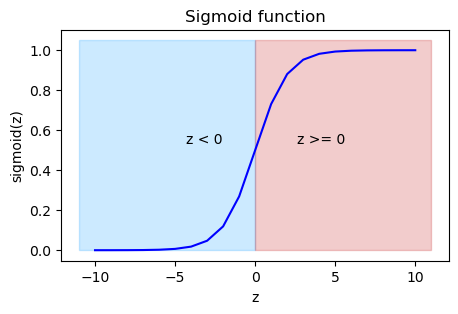

In [7]:
# Plot z vs sigmoid(z)
fig,ax = plt.subplots(1,1,figsize=(5,3))
ax.plot(z_1, y_out, c="b")

ax.set_title("Sigmoid function")
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')
draw_threshold(ax,0)

The sigmoid function approaches  `0` as `z` goes to large negative values and approaches `1` as `z` goes to large positive values.